,Degree,Variance,Bias,Bias^2,Irreducible Error,Total Error
0,1,25999.093010,819.717436,1.001683e+06,1.164153e-10,1.027682e+06
1,2,39105.833813,810.763391,9.538361e+05,0.000000e+00,9.929420e+05
2,3,56095.893210,68.510851,9.533344e+03,1.455192e-11,6.562924e+04
3,4,114907.291529,81.339711,1.058830e+04,0.000000e+00,1.254956e+05
4,5,151434.027857,78.958414,9.952445e+03,0.000000e+00,1.613865e+05
5,6,174226.744550,78.364801,9.999198e+03,2.910383e-11,1.842259e+05
6,7,198849.684616,86.916241,1.042593e+04,-5.820766e-11,2.092756e+05
7,8,221551.968136,90.327445,1.099837e+04,5.820766e-11,2.325503e+05
8,9,232378.905956,92.450149,1.160477e+04,-2.910383e-11,2.439837e+05
9,10,236185.285585,93.509377,1.292357e+04,0.000000e+00,2.491089e+05


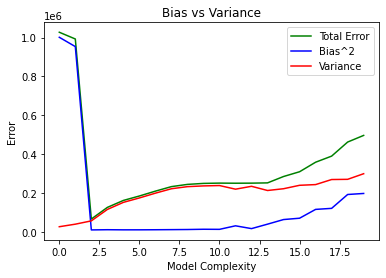

In [7]:
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import numpy
import matplotlib.pyplot
import pandas
from IPython.display import display
#loading train data
file=open('train.pkl','rb')
a=pickle.load(file)
file.close()
#loading test data
file=open('test.pkl','rb')
b=pickle.load(file)
file.close()
#Assigning x and y values
x=a[:,:-1]
y=a[:,1]
x_test=b[:,:-1]
y_test=b[:,1]
#spliting train data
x_split=numpy.array_split(x,10)
y_split=numpy.array_split(y,10)
#initiating lists
variance=[]
bias=[]
err=[]
w=[]
irr=[]
meanBiasSquare=[]
for i in range(1,21):
    poly=[]
    for j in range(0,10):
        x_poly=PolynomialFeatures(i, include_bias=False).fit_transform(x_split[j])
        x_test_poly=PolynomialFeatures(i, include_bias=False).fit_transform(x_test)
        reg=LinearRegression()
        reg.fit(x_poly,y_split[j])
        poly.append(reg.predict(x_test_poly))
        w.append((numpy.mean(((poly)-y_test)**2)))
        
        
    #total error computation    
    err.append(w[-1])
    bias_square=(numpy.mean(poly,axis=0))
    
    #bias computation
    bias.append(numpy.mean(numpy.abs(bias_square-y_test)))

    #variance computation
    variance.append(numpy.mean(numpy.var(poly,axis=0)))
    
    #bias^2 computation
    meanBiasSquare.append(numpy.mean((bias_square-y_test)**2))

#irreducible error computation
for q in range(0,20):
    irr.append(err[q]-(meanBiasSquare[q]+variance[q]))

    
table_bias=pandas.DataFrame({'Degree':numpy.array(range(1,21)),'Variance': variance, 'Bias':bias, 'Bias^2':meanBiasSquare, 'Irreducible Error':irr,'Total Error':err})
display(table_bias)
matplotlib.pyplot.plot(err,label='Total Error', color = 'green')
matplotlib.pyplot.plot(meanBiasSquare,label='Bias^2', color = 'blue')
matplotlib.pyplot.plot(variance,label='Variance', color = 'red')
matplotlib.pyplot.xlabel('Model Complexity', fontsize='medium')
matplotlib.pyplot.ylabel('Error', fontsize='medium')
matplotlib.pyplot.title("Bias vs Variance")
matplotlib.pyplot.legend()


matplotlib.pyplot.show()